# Example of hyperfine quadrupole spectrum of S2Cl2 molecule

In this example, we simulate the rotational hyperfine spectrum of $\text{S}_2\text{Cl}_2$, including the forbidden ortho-para transitions, observed by [Kanamori], and compare with results theoretical predictions from [Wichmann].

The hyperfine interaction is represented by the nuclear quadrupole coupling of the two chlorine nuclei.
Each chlorine nucleus has a nuclear spin of $I = \tfrac{3}{2}$ and a nuclear quadrupole moment of $Q = -81.65$ mb [Pyykkö].

The molecular geometry, dipole moment, and electric field gradient tensors (EFG) used in this simulation are defined in the module [s2cl2.py](s2cl2.py).

We employ effective-Hamiltonian constants for the pure rotational solutions, as given in Table 3 of [Wichmann], originally derived in [Dehghani].

References:
- [Wichmann] Wichmann, Seyfang, Quack, Mol. Phys. 119 (2021) e1959073, DOI: https://doi.org/10.1080/00268976.2021.1959073
- [Kanamori] Kanamori, Dehghani, Mizoguchi, Yasuki Endo, Phys. Rev. Lett. 119 (2017) 173401, DOI: https://doi.org/10.1103/PhysRevLett.119.173401
- [Dehghani] Dehghani, Ota, Mizoguchi, Kanamori, J. Phys. Chem. A 117 (2013) 10041, DOI: https://doi.org/10.1021/jp400632g
- [Pyykkö] Pyykkö, Year-2008 Nuclear Quadrupole Moments, Mol. Phys. 106 (2008) 1965, DOI: http://dx.doi.org/10.1080/00268970802018367

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import s2cl2
from scipy import constants
from scipy.sparse import csr_array

from richmol import CartTensor, HyperCartTensor, HyperStates, QuadMom, RotStates
from richmol.asymtop import inertia_tensor

Rotate *ab initio* calculated geometry, dipole moment, and EFG tensors to the principal axes system (PAS) frame.

In [2]:
atom_masses = s2cl2.atom_masses
atom_labels = s2cl2.atom_labels

# inertia tensor
imom = inertia_tensor(atom_masses, s2cl2.atom_xyz)

# PAS rotation matrix
d, v = np.linalg.eigh(imom)
pas = v.T

# rotate Cartesian tensors to PAS frame
dip_mol = pas @ np.array(s2cl2.dip_mol)
efg_mol_cl1 = pas @ np.array(s2cl2.efg_mol_cl1) @ pas.T
efg_mol_cl2 = pas @ np.array(s2cl2.efg_mol_cl2) @ pas.T

print("Dipole moment, x, y, z:", s2cl2.dip_mol)
print("Dipole moment in PAS, a, b, c:", dip_mol)

Dipole moment, x, y, z: [0.0, 0.0, 0.3647]
Dipole moment in PAS, a, b, c: [9.79206719e-12 3.64700000e-01 2.46334809e-11]


Compute rotational states using effective-Hamiltonian approach.

In [3]:
# Rotational constants from [Wichmann] ([Dehghani])
inp = (
    "c2",
    "A/MHz",      5533.8964,
    "B/MHz",      1393.8436,
    "C/MHz",      1232.6728,
    "DeltaJ/kHz",    0.556,
    "DeltaJK/kHz",  -5.115,
    "DeltaK/kHz",   24.70,
    "d1/kHz",        0.144
)

jmax = 10
states = RotStates.watson(jmax, inp, print_enr=True)


Compute rotational solutions using Watson's effective Hamiltonian approach
Input rotational constants (MHz):
          A  5533.896400000000 
          B  1393.843600000000 
          C  1232.672800000000 
     DeltaJ     0.000556000000 
    DeltaJK    -0.005115000000 
     DeltaK     0.024700000000 
         d1     0.000144000000 
Watson reduction form: S
Symmetry group: c2
axes convention: a -> z (near-prolate)
solve for J = 0 and symmetry A ...
solve for J = 0 and symmetry B ...
axes convention: a -> z (near-prolate)
solve for J = 1 and symmetry A ...
solve for J = 1 and symmetry B ...
axes convention: a -> z (near-prolate)
solve for J = 2 and symmetry A ...
solve for J = 2 and symmetry B ...
axes convention: a -> z (near-prolate)
solve for J = 3 and symmetry A ...
solve for J = 3 and symmetry B ...
axes convention: a -> z (near-prolate)
solve for J = 4 and symmetry A ...
solve for J = 4 and symmetry B ...
axes convention: a -> z (near-prolate)
solve for J = 5 and symmetry A ...
sol

Compare rotational energies with previously computed values, given in Table 4 of [Wichmann].

In [4]:
# Rotational energies from Table 4 of [Wichmann]
Wichmann_enr = [
    ("A", 0.00),
    ("B", 2626.51),
    ("A", 6766.55),
    ("B", 6927.72),
    ("A", 7874.91),
    ("B", 11858.42),
    ("A", 12341.92),
    ("B", 15735.97),
    ("A", 19493.36),
    ("B", 20460.26),
    ("B", 24761.81),
    ("A", 24766.42),
    ("A", 26195.98),
    ("B", 29668.03),
    ("A", 31279.05),
    ("A", 32641.42),
    ("B", 32664.47),
    ("B", 39237.15),
    ("A", 42378.20),
    ("B", 43143.92),
    ("A", 43212.88),
    ("B", 44793.19),
    ("A", 53746.16),
    ("B", 53746.24),
    ("A", 54838.34),
    ("A", 56266.17),
    ("B", 56426.26),
    ("B", 57618.84),
    ("A", 60996.00),
    ("B", 64261.43),
]

enr = sorted(
    [
        (sym, float(e))
        for j in states.enr.keys()
        for sym in states.enr[j].keys()
        for e in states.enr[j][sym]
    ],
    key=lambda arg: arg[-1],
)

for (sym, e), (ref_sym, ref_e) in zip(enr, Wichmann_enr):
    print(sym, ref_sym, e, ref_e, round(e - ref_e, 2))

A A 0.0 0.0 0.0
B B 2626.514176 2626.51 0.0
A A 6766.552505999999 6766.55 0.0
B B 6927.723305999999 6927.72 0.0
A A 7874.914476559307 7874.91 0.0
B B 11858.417173999995 11858.42 -0.0
A A 12341.929573999994 12341.92 0.01
B B 15735.97012545707 15735.97 0.0
A A 19493.336723578534 19493.36 -0.02
B B 20460.27889671142 20460.26 0.02
B B 24761.809543999996 24761.81 -0.0
A A 24766.424251440687 24766.42 0.0
A A 26195.97399489998 26195.98 -0.01
B B 29667.97277227708 29668.03 -0.06
A A 31279.102659226908 31279.05 0.05
A A 32641.421455999996 32641.42 0.0
B B 32664.469666542922 32664.47 -0.0
B B 39237.111979703 39237.15 -0.04
A A 42378.06161611046 42378.2 -0.14
B B 43143.91818124268 43143.92 -0.0
A A 43212.88455895184 43212.88 0.0
B B 44793.31326625207 44793.19 0.12
A A 53746.157948421445 53746.16 -0.0
B B 53746.24057528856 53746.24 0.0
A A 54838.24886270883 54838.34 -0.09
A A 56266.17198446328 56266.17 0.0
B B 56426.29456200181 56426.26 0.03
B B 57618.567148233444 57618.84 -0.27
A A 60996.23368107

Define symmetry rules for the coupling of rotational and nuclear spin states.

In [5]:
# Define symmetry coupling rules between rotational and nuclear spin states.
# Each Cl nucleus has spin I = 3/2, so the total nuclear spin (I_total) can be 0, 1, 2, or 3.
# The corresponding nuclear spin symmetries in C2 group are B, A, B, and A, respectively.
#
# Due to the Pauli exclusion principle, the total spin-rotational wavefunction must be
# antisymmetric (B symmetry) under exchange of the two identical fermionic Cl nuclei.
#
# As a result:
# - Nuclear spin states with I_total = 0 and 2 (B symmetry) must couple to rotational states with A symmetry.
# - Nuclear spin states with I_total = 1 and 3 (A symmetry) must couple to rotational states with B symmetry.
#
# The function `symmetry_rules` below encodes these selection rules.


def symmetry_rules(
    j_list: list[int],
    j_sym_list: dict[int, list[str]],
    spin_list: list[tuple[float]],
) -> dict[str, list[tuple[int, tuple[float], str, str]]]:
    c2_prod = {
        ("A", "B"): "B",
        ("B", "A"): "B",
        # ("A", "A"): "A",  # forbidden by Pauli principle
        # ("B", "B"): "A",  # forbidden by Pauli principle
    }
    j_spin_list = {"B": []}
    for j, spin in zip(j_list, spin_list):
        tot_spin = spin[-1]  # can be 0, 1, 2, 3
        for j_sym in j_sym_list[j]:
            if tot_spin in (1, 3):
                spin_sym = "A"
            elif tot_spin in (0, 2):
                spin_sym = "B"
            else:
                raise ValueError(
                    f"Symmetry of state with total spin = {tot_spin} is not defined"
                )
            try:
                f_sym = c2_prod[(j_sym, spin_sym)]
            except KeyError:
                continue
            j_spin_list[f_sym].append((j, spin, j_sym, spin_sym))
    return j_spin_list

Compute hyperfine states using effective-Hamiltonian rotational states, ab initio calculated EFG tensors, and quadrupole moments from [Pyykkö].

In [6]:
# Compute hyperfine states and matrix elements of laboratory-frame tensors

# since the quantization z-axis corresponds to the a-axis (see output of RotStates run),
# swap axes such that abc->zyx, i.e., permute (123)
# perm_mat = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
perm_mat = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
dip_lab = CartTensor(states, perm_mat @ dip_mol)
efg_lab_cl1 = CartTensor(states, perm_mat @ efg_mol_cl1 @ perm_mat.T)
efg_lab_cl2 = CartTensor(states, perm_mat @ efg_mol_cl2 @ perm_mat.T)

# quadrupole moments (in mb) from [Pyykkö]
quad_cl35 = QuadMom(spin=3 / 2, Q=-81.65)

hyper_states = HyperStates(
    0,
    jmax - 3,
    states,
    spin_op=[quad_cl35, quad_cl35],
    efg_op=[efg_lab_cl1, efg_lab_cl2],
    symmetry_rules=symmetry_rules,
)

hyper_dip_lab = HyperCartTensor(hyper_states, dip_lab)


Compute hyperfine states
List of F quanta: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0)]
F   tot.sym.   J   (I_1, I_12, ... I_1N)     rovib.sym.   spin.sym.  rovib.dim 
----------------------------------------------------------------------------
0.0 B          0   (1.5, 0)                  A            B          1         
0.0 B          1   (1.5, 1)                  B            A          2         
0.0 B          2   (1.5, 2)                  A            B          3         
0.0 B          3   (1.5, 3)                  B            A          4         
1.0 B          1   (1.5, 0)                  A            B          1         
1.0 B          1   (1.5, 1)                  B            A          2         
1.0 B          2   (1.5, 1)                  B            A          2         
1.0 B          1   (1.5, 2)                  A            B          1         
1.0 B          2   (1.

Print the hyperfine states and assignments, as well as the weights of ortho and para contributions.

The results are similar to those in Table 6 of [Wichmann], although here we employ ab initio calculated EFG tensors instead of experimentally determined quadrupole coupling constants.

In [14]:
# zero-point energy
zpe = np.min(
    [
        np.min(enr_sym)
        for enr_f in hyper_states.enr.values()
        for enr_sym in enr_f.values()
    ]
)

enr = []
for f in hyper_states.enr.keys():
    for sym in hyper_states.enr[f].keys():

        # extract (J, k, tau, I, F) quanta
        quanta = hyper_states.quanta_dict_k[f][sym]
        j_k_tau_i_f = [
            (*elem[6:9], elem[3], float(elem[0]))
            for elem in hyper_states.quanta_dict_k[f][sym]
        ]

        # p(I) = \sum_i |c_i|^2 for spin I=0,1,2,3
        op_quanta = hyper_states.quanta_dict_op[f][sym]

        # compute p(para) = \sum_i |c_i|^2 for spin in (0, 2)
        #     and p(ortho) = \sum_i |c_i|^2 for spin in (1, 3)
        para_coef = [sum(c for (q, c) in qua if int(q) in (0, 2)) for qua in op_quanta]
        ortho_coef = [sum(c for (q, c) in qua if int(q) in (1, 3)) for qua in op_quanta]

        # assemble (J, k, tau, I, F, energy-zpe, p(para), p(ortho))
        enr += [
            (*q, float(e - zpe), pc, oc)
            for q, e, pc, oc in zip(
                j_k_tau_i_f, hyper_states.enr[f][sym], para_coef, ortho_coef
            )
        ]


# sort wrt energy
enr = sorted(enr, key=lambda elem: elem[5])


print(
    f"{'J':>2} {'k':>2} {'tau':>1} {'I':>1} {'F':>2} {'Energy (MHz)':>16} {'p_para':>10} {'p_ortho':>10}"
)
for j, k, tau, spin, f, e, p_c, o_c in enr:
    print(
        f"{j:2d}",
        f"{k:2d}",
        f"{tau:2d}",
        f"{int(spin):2d}",
        f"{int(f):2d}",
        f"{e:16.4f}",
        f"{p_c:10.6f}",
        f"{o_c:10.6f}",
    )

 J  k tau I  F     Energy (MHz)     p_para    p_ortho
 0  0  0  2  2           0.0000   0.999995   0.000005
 0  0  0  0  0           0.0497   1.000000   0.000000
 1  0  1  1  0        2623.3040   0.000002   0.999998
 1  0  1  3  3        2624.0988   0.000007   0.999993
 1  0  1  1  2        2625.1796   0.000012   0.999988
 1  0  1  3  4        2627.3550   0.000002   0.999998
 1  0  1  1  1        2628.1159   0.000014   0.999986
 1  0  1  3  2        2629.4538   0.000009   0.999991
 1  1  1  2  1        6761.0998   0.998252   0.001748
 1  1  1  2  2        6765.8196   0.995053   0.004947
 1  1  1  2  3        6766.3671   0.998623   0.001377
 1  1  1  0  1        6771.5078   0.998133   0.001867
 1  1  0  3  2        6918.7783   0.002398   0.997602
 1  1  0  1  1        6923.3949   0.003645   0.996355
 1  1  0  3  4        6925.2274   0.000095   0.999905
 1  1  0  1  2        6932.2768   0.002948   0.997052
 1  1  0  3  3        6935.1093   0.001657   0.998343
 1  1  0  1  0        6937.0

### Compute spectrum

First define function `dipole_linestr` to compute transition linestrengths
$$
S(F',i\leftarrow F,j) = \sum_{m_F',m_F}\sum_{A=X,Y,Z}\left|\langle F',m_F',i|\mu_A|F,m_F,j\rangle\right|^2,
$$
where $i,j$ are indices of hyperfine states with total spin-rotational angular momentum $F'$ and $F$, respectively.

In [15]:
def dipole_linestr(
    dip: CartTensor,
) -> dict[tuple[float, float], dict[tuple[str, str], csr_array]]:
    assert (
        dip.rank == 1
    ), f"Unexpected rank of the input 'dip' tensor = {dip.rank} (must be equal to 1)"

    ls = {}
    for j_pair in list(set(dip.mmat.keys()) & set(dip.kmat.keys())):
        mmat = dip.mmat[j_pair]
        kmat = dip.kmat[j_pair]

        m_prefac = np.sum(
            [np.sum(np.abs(mmat_cart[1]) ** 2) for mmat_cart in mmat.values()]
        )  # must be equal to (2*j1+1)*(2*j2+1), where j1,j2=j_pair

        ls_sym = {}
        for sym_pair, kmat_s in kmat.items():
            ls_sym[sym_pair] = m_prefac * np.abs(kmat_s[1]) ** 2

        if ls_sym:
            ls[j_pair] = ls_sym

    return ls

In [16]:
ls = dipole_linestr(hyper_dip_lab)

Estimate partition function

In [17]:
temp = 3.0 # Kelvin
boltz_beta = constants.h / (constants.k * temp) * 1e6

enr, m_degen = np.array(
    [
        (e, 2*f+1)
        for f in hyper_states.f_list
        for sym in hyper_states.f_sym_list[f]
        for e in hyper_states.enr[f][sym]
    ]
).T
zpe = np.min(enr)

part_func = np.sum(m_degen * np.exp(-(enr - zpe) * boltz_beta))
print(f"partition function for (T = {temp} K):", part_func)

partition function for (T = 3.0 K): 1471.734375339786


Compute absorption intensities for selected frequency range.

In [20]:
# frequency range (MHz)
# nu1 = 12300
# nu2 = 13000
nu1 = 12416
nu2 = 12433

fac_cm_molecule = 8.0e-41 * np.pi**3 / (3.0 * constants.h * constants.c**2)


freq = []
abscoef = []
spin_label = []

for (f1, f2), ls_j in ls.items():
    for (sym1, sym2), ls_sym in ls_j.items():

        enr1 = hyper_states.enr[f1][sym1]
        enr2 = hyper_states.enr[f2][sym2]
        spin1 = np.array(
            [int(qua[0][0]) for qua in hyper_states.quanta_dict_op[f1][sym1]]
        )
        spin2 = np.array(
            [int(qua[0][0]) for qua in hyper_states.quanta_dict_op[f2][sym2]]
        )

        # absorption coefficients

        spin12 = np.abs(spin1[:, None] - spin2[None, :])
        nu = np.abs(enr1[:, None] - enr2[None, :])
        cond = enr1[:, None] < enr2[None, :]
        elow = np.where(cond, enr1[:, None], enr2[None, :])
        boltz_fac = np.exp(-(elow - zpe) * boltz_beta) / part_func
        intens = (
            ls_sym
            * boltz_fac
            * nu
            * (1 - np.exp(-abs(nu) * boltz_beta))
            * fac_cm_molecule
        )

        if f1 == f2:
            ind = np.triu_indices(n=len(enr1), m=len(enr2), k=1)
        else:
            ind = np.triu_indices(n=len(enr1), m=len(enr2), k=0)

        nu = nu[ind]
        intens = intens.toarray()[ind]
        spin12 = spin12[ind]

        ind = np.where((nu >= nu1) & (nu <= nu2))
        abscoef.append(intens[ind])
        freq.append(nu[ind])
        spin_label.append(spin12[ind])

freq = np.concatenate(freq)
abscoef = np.concatenate(abscoef)
spin_label = np.concatenate(spin_label)

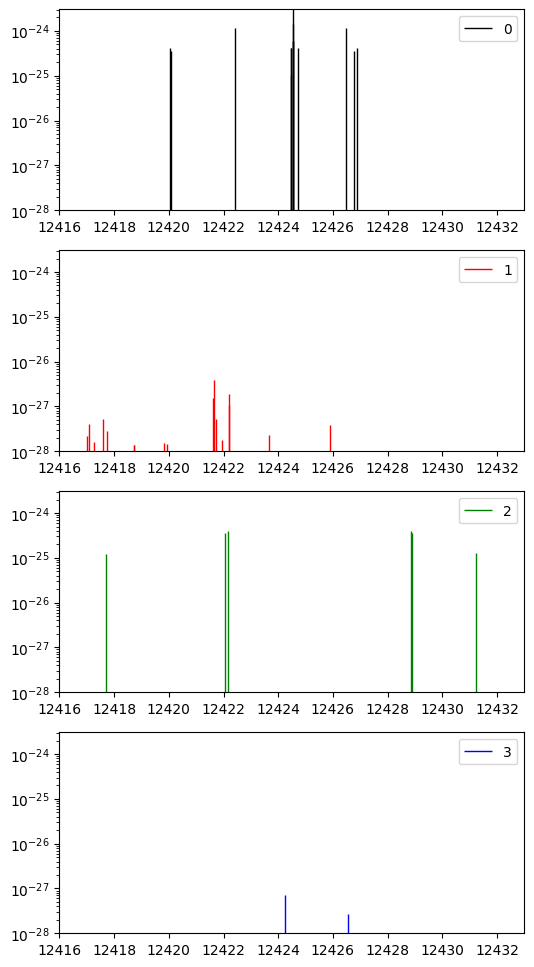

In [24]:
fig = plt.figure(figsize=(6, 12))
axs = [fig.add_subplot(4, 1, i + 1) for i in range(4)]

color = ("black", "red", "green", "blue")
for s, ax in enumerate(axs):
    ind = np.where(spin_label == s)[0]
    if len(ind) == 0:
        continue
    ax.vlines(
        freq[ind], ymin=0, ymax=abscoef[ind], color=color[s], linewidth=1, label=f"{s}"
    )
    ax.set_xlim([nu1, nu2])
    ax.set_ylim([1e-28,np.max(abscoef)])
    ax.set_yscale('log')
    ax.legend()
plt.show()